# feature_create

In [1]:
import pandas as pd

inputfile = './data/death_317.xlsx'
data_vital_signs = pd.read_excel(inputfile, sheet_name=u'生命体征', skiprows=2, header=None)

# 删除序号、日期、时间列，重命名列名
data_vital_signs.drop(labels=[0, 2, 3], axis=1, inplace=True)
data_vital_signs.columns = ['id', 'temperature', 'heart_rate', 'breath_rate', 'systollic_pressure', 'diastolic_pressure', 'oxygen_saturation']

data_vital_signs['id'] = data_vital_signs['id'].fillna(method='pad')
data_vital_signs.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,17474797.0,NaN,98,19,130,64,96
1,17474797.0,36.8,64,18,130,76,97
2,17474797.0,37.9,89,18,182,73,96
3,17474797.0,36.8,87,19,130,68,94
4,17474797.0,37.2,103,20,141,77,97


In [2]:
# temperature异常值处理，超过50或低于30 设为空值
for i in range(len(data_vital_signs)):
    temp = data_vital_signs.iloc[i,1]
    if type(temp) != str and (temp > 50 or temp < 30):
        data_vital_signs.iloc[i,1] = None
        #print(temp)

In [3]:
# 用前一时刻值填充NaN
data_vital_signs = data_vital_signs.fillna(method='pad')
data_vital_signs.isnull().sum()

id                    0
temperature           1
heart_rate            0
breath_rate           0
systollic_pressure    0
diastolic_pressure    0
oxygen_saturation     0
dtype: int64

In [4]:
# 对所有str用上一时刻值替代
row, col = data_vital_signs.shape
count = 0               
for i in range(row):
    for j in range(col):
        temp = data_vital_signs.iloc[i,j]
        if type(temp) == str:
            count += 1
            data_vital_signs.iloc[i,j] = data_vital_signs.iloc[i-1,j]
            #print(temp,"--->",data_vital_signs.iloc[i,j])
print("---------",count)

--------- 1953


In [5]:
data_vital_signs.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure     object
diastolic_pressure     object
oxygen_saturation       int64
dtype: object

In [6]:
data_vital_signs['temperature'] = data_vital_signs['temperature'] .astype(float)
data_vital_signs['heart_rate'] = data_vital_signs['heart_rate'] .astype(int)
data_vital_signs['breath_rate'] = data_vital_signs['breath_rate'] .astype(int)
data_vital_signs['systollic_pressure'] = data_vital_signs['systollic_pressure'] .astype(int)
data_vital_signs['diastolic_pressure'] = data_vital_signs['diastolic_pressure'] .astype(int)

data_vital_signs.dtypes

id                    float64
temperature           float64
heart_rate              int32
breath_rate             int32
systollic_pressure      int32
diastolic_pressure      int32
oxygen_saturation       int64
dtype: object

In [7]:
data_vital_signs.iloc[0, 1] = 36.8
labels = [0] * len(data_vital_signs)   # 0 死亡
data_vital_signs['labels'] = labels

print(data_vital_signs.shape)
data_vital_signs.head()

(26249, 8)


,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation,labels
0,17474797.0,36.8,98,19,130,64,96,0
1,17474797.0,36.8,64,18,130,76,97,0
2,17474797.0,37.9,89,18,182,73,96,0
3,17474797.0,36.8,87,19,130,68,94,0
4,17474797.0,37.2,103,20,141,77,97,0


In [8]:
inputfile_non = './data/non_death_797.xlsx'
data_vital_signs_non = pd.read_excel(inputfile_non, sheet_name=u'生命体征', skiprows=3, header=None)

data_vital_signs_non.drop(labels=[0, 1, 3, 4, 11, 12, 13, 14], axis=1, inplace=True)
data_vital_signs_non.columns = ['id', 'temperature', 'heart_rate', 'breath_rate', 'systollic_pressure', 'diastolic_pressure', 'oxygen_saturation']

data_vital_signs_non['id'] = data_vital_signs_non['id'].fillna(method='pad')
data_vital_signs_non.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,21607239.0,NaN,111,22,100,61,98
2,21607239.0,37.4,110,20,156,76,97
3,21607239.0,NaN,99,22,127,76,100
4,21607239.0,NaN,97,20,108,69,99


In [9]:
# temperature异常值处理，超过50或低于30 设为空值
for i in range(len(data_vital_signs_non)):
    temp = data_vital_signs_non.iloc[i,1]
    if type(temp) != str and (temp > 50 or temp < 30):
        data_vital_signs_non.iloc[i,1] = None
        #print(temp)

In [10]:
# 用前一时刻值填充NaN
data_vital_signs_non = data_vital_signs_non.fillna(method='pad')
data_vital_signs_non.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,21607239.0,37.2,111,22,100,61,98
2,21607239.0,37.4,110,20,156,76,97
3,21607239.0,37.4,99,22,127,76,100
4,21607239.0,37.4,97,20,108,69,99


In [11]:
data_vital_signs_non.isnull().sum().sum()

0

In [12]:
data_vital_signs_non.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure     object
diastolic_pressure     object
oxygen_saturation      object
dtype: object

In [13]:
# 对所有str用上一时刻值替代
row, col = data_vital_signs_non.shape
count = 0               
for i in range(row):
    for j in range(col):
        temp = data_vital_signs_non.iloc[i,j]
        if type(temp) == str:
            count += 1
            data_vital_signs_non.iloc[i,j] = data_vital_signs_non.iloc[i-1,j]
            #print(temp,"--->",data_vital_signs_non.iloc[i,j])
print("---------",count)

--------- 19083


In [14]:
data_vital_signs_non.dtypes

id                    float64
temperature            object
heart_rate             object
breath_rate            object
systollic_pressure      int64
diastolic_pressure     object
oxygen_saturation      object
dtype: object

In [15]:
data_vital_signs_non['temperature'] = data_vital_signs_non['temperature'] .astype(float)
data_vital_signs_non['heart_rate'] = data_vital_signs_non['heart_rate'] .astype(int)
data_vital_signs_non['breath_rate'] = data_vital_signs_non['breath_rate'] .astype(int)
data_vital_signs_non['diastolic_pressure'] = data_vital_signs_non['diastolic_pressure'] .astype(int)
data_vital_signs_non['oxygen_saturation'] = data_vital_signs_non['oxygen_saturation'] .astype(int)

labels = [1] * len(data_vital_signs_non)   # 1 存活
data_vital_signs_non['labels'] = labels

print(data_vital_signs_non.shape)
data_vital_signs_non.head()

(79635, 8)


,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation,labels
0,21607239.0,37.2,111,20,99,72,99,1
1,21607239.0,37.2,111,22,100,61,98,1
2,21607239.0,37.4,110,20,156,76,97,1
3,21607239.0,37.4,99,22,127,76,100,1
4,21607239.0,37.4,97,20,108,69,99,1


In [16]:
data = pd.concat([data_vital_signs_non, data_vital_signs], ignore_index=True)
data.shape

(105884, 8)

In [17]:
time_interval_n = 48   # 12 (1034)、24 (923)、48 (699)、

In [18]:
ID_count = data.groupby("id").count().labels

In [19]:
ID_count[ID_count > time_interval_n].count()

699

In [20]:
data = data.groupby("id").head(time_interval_n)       # 前time_interval_n条记录，基本一小时一条记录

In [21]:
data.head()

,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation,labels
0,21607239.0,37.2,111,20,99,72,99,1
1,21607239.0,37.2,111,22,100,61,98,1
2,21607239.0,37.4,110,20,156,76,97,1
3,21607239.0,37.4,99,22,127,76,100,1
4,21607239.0,37.4,97,20,108,69,99,1


In [22]:
data.shape

(44393, 8)

In [23]:
y = data[['id', 'labels']].groupby('id').mean()

In [24]:
data.drop('labels', axis=1, inplace=True)
data.head()

d:\python3.6.0\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,temperature,heart_rate,breath_rate,systollic_pressure,diastolic_pressure,oxygen_saturation
0,21607239.0,37.2,111,20,99,72,99
1,21607239.0,37.2,111,22,100,61,98
2,21607239.0,37.4,110,20,156,76,97
3,21607239.0,37.4,99,22,127,76,100
4,21607239.0,37.4,97,20,108,69,99


In [25]:
data.dtypes

id                    float64
temperature           float64
heart_rate              int32
breath_rate             int32
systollic_pressure      int64
diastolic_pressure      int32
oxygen_saturation       int64
dtype: object

In [26]:
from tsfresh import extract_features     # 4578
extracted_features = extract_features(data, column_id="id")
extracted_features.shape

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [03:27<00:00, 20.79s/it]


(1117, 4578)

In [27]:
extracted_features.columns

Index(['breath_rate__abs_energy', 'breath_rate__absolute_sum_of_changes',
       'breath_rate__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       'breath_rate__agg_autocorrelation__f_agg_"median"__maxlag_40',
       'breath_rate__agg_autocorrelation__f_agg_"var"__maxlag_40',
       'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"max"',
       'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"',
       'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"',
       'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"',
       'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"',
       ...
       'temperature__symmetry_looking__r_0.9500000000000001',
       'temperature__time_reversal_asymmetry_statistic__lag_1',
       'temperature__time_reversal_asymmetry_statistic__lag_2',
       'temperature__time_reversal_asymmetry_statistic__lag_3',
       'temperature__value_cou

In [28]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
filtered_features = select_features(extracted_features, y['labels'])
filtered_features.head()

d:\python3.6.0\lib\site-packages\tsfresh\utilities\dataframe_functions.py:173: RuntimeWarning: The columns ['breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"'
 'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"'
 'breath_rate__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"'
 ... 'temperature__fft_coefficient__attr_"real"__coeff_97'
 'temperature__fft_coefficient__attr_"real"__coeff_98'
 'temperature__fft_coefficient__attr_"real"__coeff_99'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


variable,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,"oxygen_saturation__linear_trend__attr_""stderr""",systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,"diastolic_pressure__fft_coefficient__attr_""abs""__coeff_0","diastolic_pressure__fft_coefficient__attr_""real""__coeff_0",diastolic_pressure__sum_values,temperature__sum_of_reoccurring_data_points,...,"oxygen_saturation__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)","temperature__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.2","diastolic_pressure__fft_coefficient__attr_""angle""__coeff_24","temperature__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","temperature__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4","oxygen_saturation__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2",systollic_pressure__autocorrelation__lag_1,systollic_pressure__partial_autocorrelation__lag_1
id,,,,,,,,,,,,,,,,,,,,,
31237.0,137.0,170.0,0.173205,274.0,0.500000,0.750000,326.0,326.0,326.0,72.6,...,193.373396,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.719298,-0.719298
39576.0,1755.0,2329.0,0.035839,3971.0,0.187500,0.520833,3125.0,3125.0,3125.0,1756.0,...,181.952989,0.000000,0.0,0.000000,25.25,0.000000,1.000000,0.189189,0.786814,0.786814
42802.0,930.0,1910.0,0.019629,2664.0,0.145833,0.562500,2723.0,2723.0,2723.0,1723.7,...,188.110007,0.004275,180.0,0.004275,144.00,0.015000,-0.266667,0.687500,0.402204,0.402204
43740.0,0.0,286.0,0.149325,0.0,0.250000,0.750000,548.0,548.0,548.0,293.6,...,193.373396,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.007022,-0.007022
55893.0,1316.0,2066.0,0.019166,3984.0,0.125000,0.479167,2950.0,2950.0,2950.0,1753.8,...,193.574016,0.008858,180.0,0.008858,36.64,0.023529,-0.076923,0.263158,0.618414,0.618414


In [29]:
filtered_features.shape

(1117, 1012)

In [30]:
pd.set_option('display.max_rows', None)      # 显示所有行

filtered_features.describe().T

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
systollic_pressure__sum_of_reoccurring_values,1117.0,1.061163e+03,5.148076e+02,0.000000e+00,7.200000e+02,1.160000e+03,1.433000e+03,2.492000e+03
diastolic_pressure__sum_of_reoccurring_data_points,1117.0,1.885748e+03,9.045197e+02,0.000000e+00,1.283000e+03,2.100000e+03,2.553000e+03,4.189000e+03
"oxygen_saturation__linear_trend__attr_""stderr""",1117.0,1.427127e-01,8.010285e-01,0.000000e+00,1.624003e-02,2.666974e-02,5.707382e-02,2.080504e+01
systollic_pressure__sum_of_reoccurring_data_points,1117.0,2.702011e+03,1.338319e+03,0.000000e+00,1.738000e+03,3.034000e+03,3.687000e+03,6.164000e+03
oxygen_saturation__ratio_value_number_to_time_series_length,1117.0,2.396829e-01,1.655740e-01,4.166667e-02,1.458333e-01,1.875000e-01,2.708333e-01,1.000000e+00
diastolic_pressure__ratio_value_number_to_time_series_length,1117.0,5.770239e-01,1.503693e-01,1.304348e-01,4.791667e-01,5.625000e-01,6.458333e-01,1.000000e+00
"diastolic_pressure__fft_coefficient__attr_""abs""__coeff_0",1117.0,2.734994e+03,1.081094e+03,9.600000e+01,2.101000e+03,3.000000e+03,3.493000e+03,5.399000e+03
"diastolic_pressure__fft_coefficient__attr_""real""__coeff_0",1117.0,2.734994e+03,1.081094e+03,9.600000e+01,2.101000e+03,3.000000e+03,3.493000e+03,5.399000e+03
diastolic_pressure__sum_values,1117.0,2.734994e+03,1.081094e+03,9.600000e+01,2.101000e+03,3.000000e+03,3.493000e+03,5.399000e+03


In [31]:
outputfile = './Time_interval_validation_of_data_vital_signs/head_48_feature_create.xlsx'
filtered_features.to_excel(outputfile)

In [32]:
filtered_features.head()

variable,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,"oxygen_saturation__linear_trend__attr_""stderr""",systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,"diastolic_pressure__fft_coefficient__attr_""abs""__coeff_0","diastolic_pressure__fft_coefficient__attr_""real""__coeff_0",diastolic_pressure__sum_values,temperature__sum_of_reoccurring_data_points,...,"oxygen_saturation__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)","temperature__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.2","diastolic_pressure__fft_coefficient__attr_""angle""__coeff_24","temperature__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","temperature__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4","oxygen_saturation__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2",systollic_pressure__autocorrelation__lag_1,systollic_pressure__partial_autocorrelation__lag_1
id,,,,,,,,,,,,,,,,,,,,,
31237.0,137.0,170.0,0.173205,274.0,0.500000,0.750000,326.0,326.0,326.0,72.6,...,193.373396,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.719298,-0.719298
39576.0,1755.0,2329.0,0.035839,3971.0,0.187500,0.520833,3125.0,3125.0,3125.0,1756.0,...,181.952989,0.000000,0.0,0.000000,25.25,0.000000,1.000000,0.189189,0.786814,0.786814
42802.0,930.0,1910.0,0.019629,2664.0,0.145833,0.562500,2723.0,2723.0,2723.0,1723.7,...,188.110007,0.004275,180.0,0.004275,144.00,0.015000,-0.266667,0.687500,0.402204,0.402204
43740.0,0.0,286.0,0.149325,0.0,0.250000,0.750000,548.0,548.0,548.0,293.6,...,193.373396,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.007022,-0.007022
55893.0,1316.0,2066.0,0.019166,3984.0,0.125000,0.479167,2950.0,2950.0,2950.0,1753.8,...,193.574016,0.008858,180.0,0.008858,36.64,0.023529,-0.076923,0.263158,0.618414,0.618414


In [33]:
print(y.shape)
y.head()

(1117, 1)


,labels
id,
31237.0,0
39576.0,1
42802.0,0
43740.0,0
55893.0,1


In [34]:
data_temp = filtered_features.join(y)
data_temp.shape

(1117, 1013)

In [35]:
data_temp.head()

,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,"oxygen_saturation__linear_trend__attr_""stderr""",systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,"diastolic_pressure__fft_coefficient__attr_""abs""__coeff_0","diastolic_pressure__fft_coefficient__attr_""real""__coeff_0",diastolic_pressure__sum_values,temperature__sum_of_reoccurring_data_points,...,"temperature__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.2","diastolic_pressure__fft_coefficient__attr_""angle""__coeff_24","temperature__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","temperature__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4","oxygen_saturation__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2",systollic_pressure__autocorrelation__lag_1,systollic_pressure__partial_autocorrelation__lag_1,labels
id,,,,,,,,,,,,,,,,,,,,,
31237.0,137.0,170.0,0.173205,274.0,0.500000,0.750000,326.0,326.0,326.0,72.6,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.719298,-0.719298,0
39576.0,1755.0,2329.0,0.035839,3971.0,0.187500,0.520833,3125.0,3125.0,3125.0,1756.0,...,0.000000,0.0,0.000000,25.25,0.000000,1.000000,0.189189,0.786814,0.786814,1
42802.0,930.0,1910.0,0.019629,2664.0,0.145833,0.562500,2723.0,2723.0,2723.0,1723.7,...,0.004275,180.0,0.004275,144.00,0.015000,-0.266667,0.687500,0.402204,0.402204,0
43740.0,0.0,286.0,0.149325,0.0,0.250000,0.750000,548.0,548.0,548.0,293.6,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,-0.007022,-0.007022,0
55893.0,1316.0,2066.0,0.019166,3984.0,0.125000,0.479167,2950.0,2950.0,2950.0,1753.8,...,0.008858,180.0,0.008858,36.64,0.023529,-0.076923,0.263158,0.618414,0.618414,1


In [36]:
#outputfile = './Time_interval_validation_of_data_vital_signs/head_24_feature_create_data_vital_signs.xlsx'
#data_temp.to_excel(outputfile)

In [36]:
# min-max标准化
import numpy as np
data = data_temp.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data.head()

,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,"oxygen_saturation__linear_trend__attr_""stderr""",systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,"diastolic_pressure__fft_coefficient__attr_""abs""__coeff_0","diastolic_pressure__fft_coefficient__attr_""real""__coeff_0",diastolic_pressure__sum_values,temperature__sum_of_reoccurring_data_points,...,"temperature__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.2","diastolic_pressure__fft_coefficient__attr_""angle""__coeff_24","temperature__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","temperature__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","heart_rate__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4","oxygen_saturation__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2",systollic_pressure__autocorrelation__lag_1,systollic_pressure__partial_autocorrelation__lag_1,labels
id,,,,,,,,,,,,,,,,,,,,,
31237.0,0.054976,0.040582,0.008325,0.044452,0.478261,0.712500,0.043372,0.043372,0.043372,0.037971,...,0.000000,0.0,0.000000,0.000000,0.000000,0.730159,0.000000,0.144601,0.144601,0.0
39576.0,0.704254,0.555980,0.001723,0.644225,0.152174,0.448958,0.571186,0.571186,0.571186,0.918410,...,0.000000,0.0,0.000000,0.009161,0.000000,0.746032,0.021021,0.920463,0.920463,1.0
42802.0,0.373194,0.455956,0.000943,0.432187,0.108696,0.496875,0.495380,0.495380,0.495380,0.901517,...,0.008550,1.0,0.010993,0.052245,0.045000,0.725926,0.076389,0.722334,0.722334,0.0
43740.0,0.000000,0.068274,0.007177,0.000000,0.217391,0.712500,0.085235,0.085235,0.085235,0.153556,...,0.000000,0.0,0.000000,0.000000,0.000000,0.730159,0.000000,0.511525,0.511525,0.0
55893.0,0.528090,0.493196,0.000921,0.646334,0.086957,0.401042,0.538186,0.538186,0.538186,0.917259,...,0.017716,1.0,0.022778,0.013293,0.070588,0.728938,0.029240,0.833713,0.833713,1.0


In [37]:
outputfile = './Time_interval_validation_of_data_vital_signs/head_48_feature_create_data_vital_signs_StandardScaler.xlsx'
data.to_excel(outputfile)

# read data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm
from sklearn.model_selection import GridSearchCV,StratifiedKFold, KFold
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,balanced_accuracy_score,auc
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.externals import joblib

inputfile = './Time_interval_validation_of_data_vital_signs/head_48_feature_create_data_vital_signs_StandardScaler.xlsx'
data = pd.read_excel(inputfile, index_col='id')

data.head()

d:\python3.6.0\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__linear_trend__attr_stderr,systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,diastolic_pressure__fft_coefficient__attr_abs__coeff_0,diastolic_pressure__fft_coefficient__attr_real__coeff_0,diastolic_pressure__sum_values,temperature__sum_of_reoccurring_data_points,...,temperature__change_quantiles__f_agg_var__isabs_False__qh_0.4__ql_0.2,diastolic_pressure__fft_coefficient__attr_angle__coeff_24,temperature__change_quantiles__f_agg_var__isabs_True__qh_0.4__ql_0.2,heart_rate__change_quantiles__f_agg_var__isabs_False__qh_0.2__ql_0.0,temperature__change_quantiles__f_agg_mean__isabs_True__qh_0.4__ql_0.2,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.4,oxygen_saturation__change_quantiles__f_agg_mean__isabs_True__qh_0.6__ql_0.2,systollic_pressure__autocorrelation__lag_1,systollic_pressure__partial_autocorrelation__lag_1,labels
id,,,,,,,,,,,,,,,,,,,,,
31237,0.054976,0.040582,0.008325,0.044452,0.478261,0.712500,0.043372,0.043372,0.043372,0.037971,...,0.000000,0,0.000000,0.000000,0.000000,0.730159,0.000000,0.144601,0.144601,0
39576,0.704254,0.555980,0.001723,0.644225,0.152174,0.448958,0.571186,0.571186,0.571186,0.918410,...,0.000000,0,0.000000,0.009161,0.000000,0.746032,0.021021,0.920463,0.920463,1
42802,0.373194,0.455956,0.000943,0.432187,0.108696,0.496875,0.495380,0.495380,0.495380,0.901517,...,0.008550,1,0.010993,0.052245,0.045000,0.725926,0.076389,0.722334,0.722334,0
43740,0.000000,0.068274,0.007177,0.000000,0.217391,0.712500,0.085235,0.085235,0.085235,0.153556,...,0.000000,0,0.000000,0.000000,0.000000,0.730159,0.000000,0.511525,0.511525,0
55893,0.528090,0.493196,0.000921,0.646334,0.086957,0.401042,0.538186,0.538186,0.538186,0.917259,...,0.017716,1,0.022778,0.013293,0.070588,0.728938,0.029240,0.833713,0.833713,1


In [2]:
X = data.iloc[:, 0:1012]
y = data.iloc[:, 1012]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)  # 保证分割后y的比例分布与原数据一致

data.shape, X_train.shape, X_test.shape

((1117, 1013), (893, 1012), (224, 1012))

In [3]:
y_test.value_counts()

1    160
0     64
Name: labels, dtype: int64

# model test

## LR

In [4]:

lr = LR(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
        intercept_scaling=1, class_weight='balanced', random_state=1, solver='liblinear', 
        max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

lr.fit(X_train, y_train)

lr_y_predict = lr.predict(X_test)
lr_y_probs = lr.predict_proba(X_test) # model score

train_lr_y_score = lr.score(X_train, y_train)
test_lr_y_score = lr.score(X_test, y_test)
print("Accuracy of LR Classifier(Train): {score}".format(score=train_lr_y_score))
print("Accuracy of LR Classifier(Test): {score}".format(score=test_lr_y_score))

Accuracy of LR Classifier(Train): 0.8756998880179171
Accuracy of LR Classifier(Test): 0.8258928571428571


In [5]:
print("LR Classifier: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lr_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, lr_y_probs[:, 1])))        # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lr_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lr_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lr_y_predict)))  # 平衡精度

LR Classifier: 
ACCURACY         : 0.8258928571428571
AUC              : 0.9173828125
RECALL           : 0.86875
PRECISION        : 0.8853503184713376
BALANCED_ACCURACY: 0.79375


## LightGBM

In [6]:
# Parameters
# Do not support special JSON characters in feature name.
params = {"objective": "binary", 
          "boosting": "gbdt",
          "metric": {"binary_logloss", "auc"},
          "max_depth": 2,
          "n_jobs":-1,
          "verbose":-1}

num_folds = 5
roc_auc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
pred_on_test = np.zeros(X_test.shape[0])


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2020)
for index, (train_index, valid_index) in enumerate(kf.split(X=X_train, y=y_train)):
    print(f"FOLD {index+1}")

    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_index], y_train.iloc[valid_index]

    dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

    lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

    feature_importances[f'fold_{index + 1}'] = lgb.feature_importance()

    y_valid_pred = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
    pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds

    # winsorization
    y_valid_pred = np.clip(a=y_valid_pred, a_min=0, a_max=1)
    pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)

    print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred),5)}")
    roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred)/num_folds)
    
print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc),5)}")

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.053317	valid_1's auc: 0.900276	valid_1's binary_logloss: 0.374221
[500]	training's auc: 1	training's binary_logloss: 0.00900035	valid_1's auc: 0.884957	valid_1's binary_logloss: 0.473355
Early stopping, best iteration is:
[188]	training's auc: 1	training's binary_logloss: 0.0835177	valid_1's auc: 0.907782	valid_1's binary_logloss: 0.354747
FOLD 1: ROC_AUC  => 0.90778
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0505227	valid_1's auc: 0.848652	valid_1's binary_logloss: 0.423404
[500]	training's auc: 1	training's binary_logloss: 0.00853433	valid_1's auc: 0.846201	valid_1's binary_logloss: 0.532321
Early stopping, best iteration is:
[129]	training's auc: 0.999816	training's binary_logloss: 0.127811	valid_1's auc: 0.852941	valid_1's binary_logloss: 0.394483
FOLD 2: ROC_AUC  => 0.85294
FOLD 3
Tr

In [7]:
# 五折交叉验证平均预测结果  
threshold = 0.5
lgb_y_predict = []

for pred in pred_on_test:  
    result = 1 if pred > threshold else 0
    lgb_y_predict.append(result)
    
print("LightGBM: ")
print("ACCURACY         : {score}".format(score=accuracy_score(y_test, lgb_y_predict)))           # 准确率
print("AUC              : {score}".format(score=roc_auc_score(y_test, pred_on_test)))            # AUC
print("RECALL           : {score}".format(score=recall_score(y_test, lgb_y_predict)))             # 召回率
print("PRECISION        : {score}".format(score=precision_score(y_test, lgb_y_predict)))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=balanced_accuracy_score(y_test, lgb_y_predict)))  # 平衡精度

LightGBM: 
ACCURACY         : 0.8839285714285714
AUC              : 0.92001953125
RECALL           : 0.96875
PRECISION        : 0.8806818181818182
BALANCED_ACCURACY: 0.8203125


In [8]:
def plot_feature_importance(df, k_fold_object):
    df['average_feature_imp'] = df[['fold_{}'.format(fold + 1) for fold in range(k_fold_object.n_splits)]].mean(axis=1)
    plt.figure(figsize=(10, 40))
    sns.barplot(data=df.sort_values(by='average_feature_imp', ascending=False), x='average_feature_imp', y='feature');
    plt.title('Feature importance over {} folds average'.format(k_fold_object.n_splits))
    plt.show()

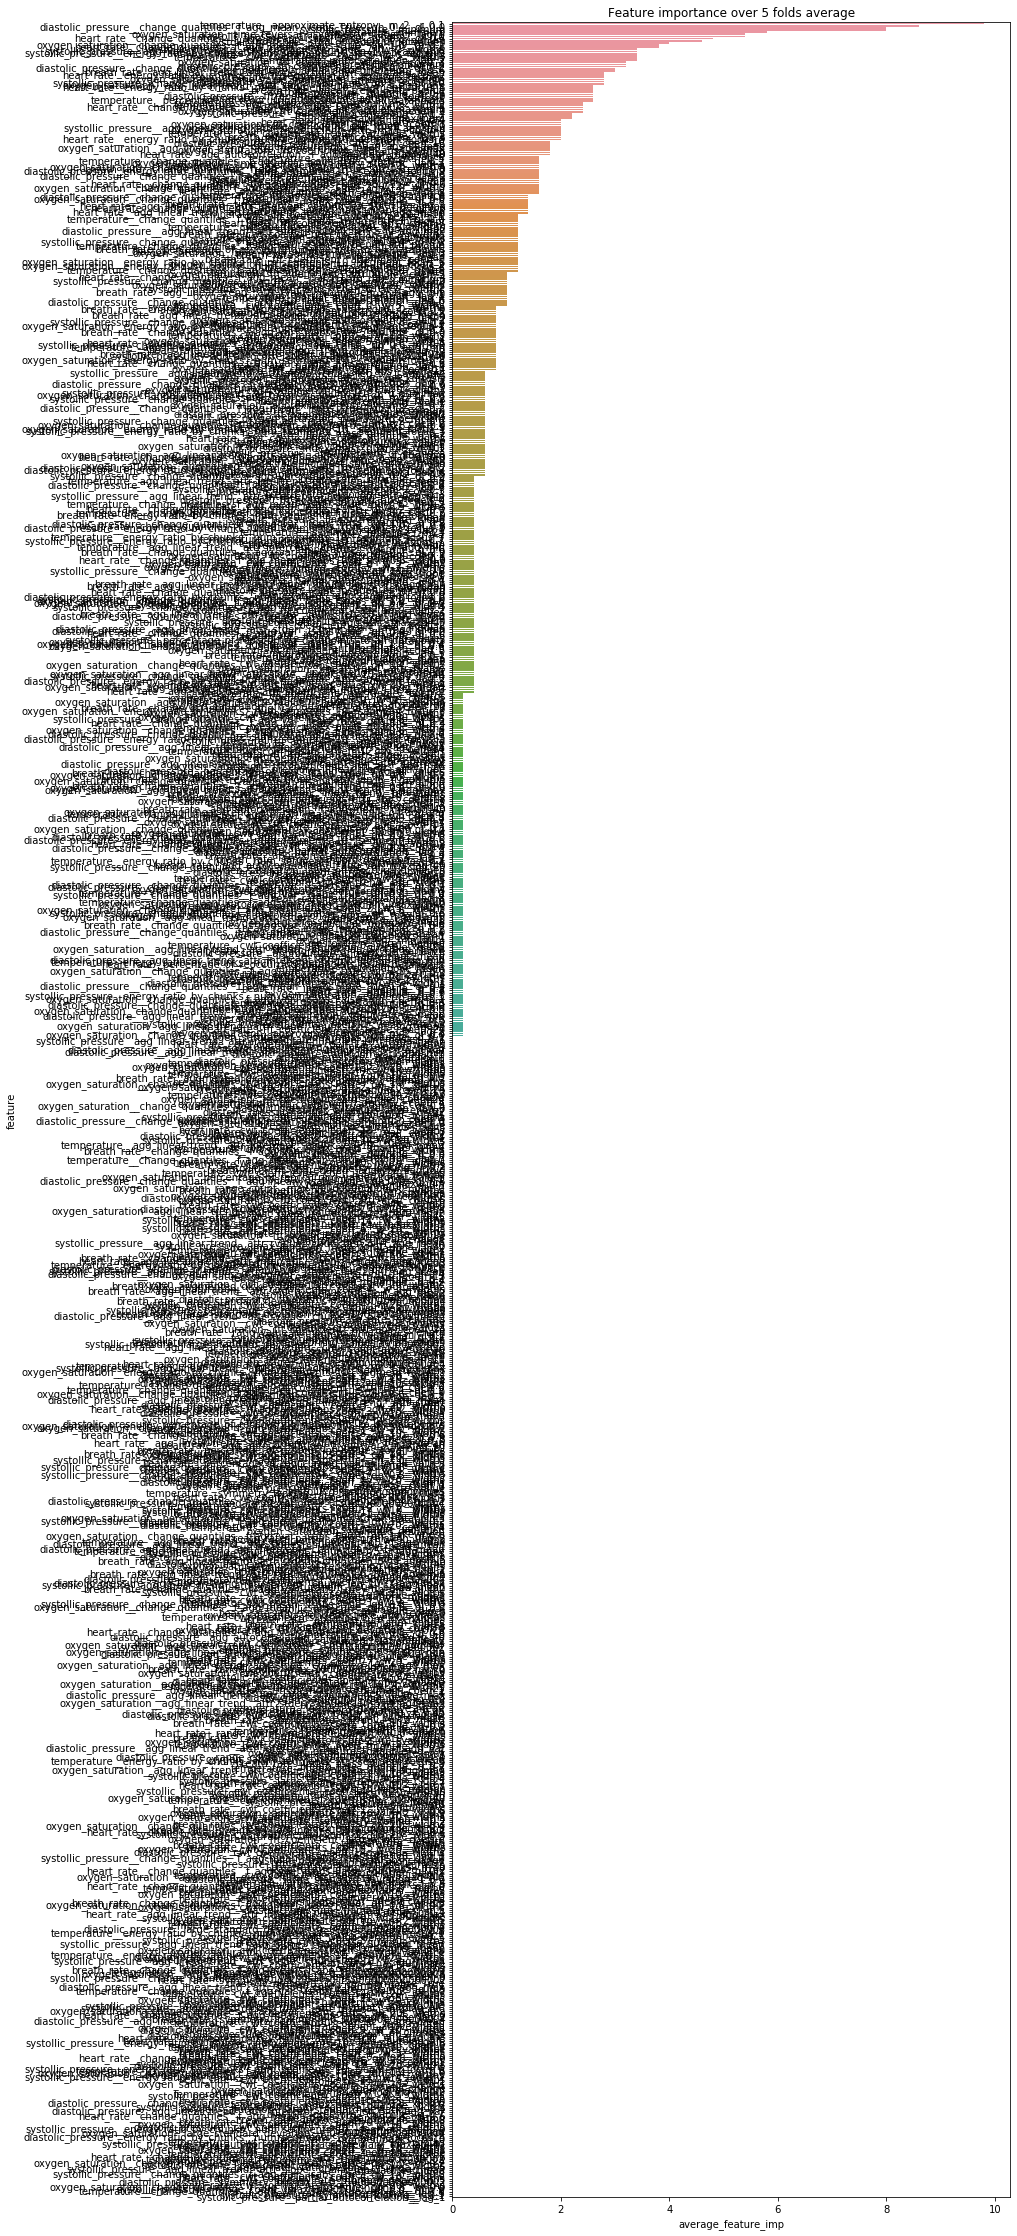

In [9]:
plot_feature_importance(df=feature_importances, k_fold_object=kf)

In [10]:
feature_importances

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average_feature_imp
0,systollic_pressure__sum_of_reoccurring_values,5,2,1,8,7,4.6
1,diastolic_pressure__sum_of_reoccurring_data_po...,0,0,1,0,0,0.2
2,oxygen_saturation__linear_trend__attr_stderr,0,0,0,1,0,0.2
3,systollic_pressure__sum_of_reoccurring_data_po...,0,1,1,0,1,0.6
4,oxygen_saturation__ratio_value_number_to_time_...,4,3,3,2,2,2.8
...,...,...,...,...,...,...,...
1007,temperature__change_quantiles__f_agg_mean__isa...,0,0,0,0,0,0.0
1008,heart_rate__change_quantiles__f_agg_mean__isab...,8,6,3,1,9,5.4
1009,oxygen_saturation__change_quantiles__f_agg_mea...,0,0,0,0,0,0.0
1010,systollic_pressure__autocorrelation__lag_1,0,0,0,0,0,0.0


## feature selection

In [11]:
# 排除重要性为0的特征
feature = feature_importances[feature_importances['average_feature_imp'] != 0]
feature.head()

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average_feature_imp
0,systollic_pressure__sum_of_reoccurring_values,5,2,1,8,7,4.6
1,diastolic_pressure__sum_of_reoccurring_data_po...,0,0,1,0,0,0.2
2,oxygen_saturation__linear_trend__attr_stderr,0,0,0,1,0,0.2
3,systollic_pressure__sum_of_reoccurring_data_po...,0,1,1,0,1,0.6
4,oxygen_saturation__ratio_value_number_to_time_...,4,3,3,2,2,2.8


In [12]:
feature_sort = feature.sort_values(by="average_feature_imp" , ascending=False)

In [13]:
outputfile = './Time_interval_validation_of_data_vital_signs/head_48_feature_importance.xlsx'
feature_sort.to_excel(outputfile)

In [14]:
feature_ne0 = feature['feature']
feature_ne0.shape

(472,)

In [15]:
data_feature_ne0 = data[feature_ne0]
print(data_feature_ne0.shape)
data_feature_ne0.head()

(1117, 472)


,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__linear_trend__attr_stderr,systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,diastolic_pressure__fft_coefficient__attr_abs__coeff_0,temperature__sum_of_reoccurring_data_points,systollic_pressure__abs_energy,diastolic_pressure__percentage_of_reoccurring_values_to_all_values,...,diastolic_pressure__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.2,diastolic_pressure__fft_coefficient__attr_angle__coeff_20,oxygen_saturation__fft_coefficient__attr_imag__coeff_7,temperature__fft_coefficient__attr_abs__coeff_10,systollic_pressure__cwt_coefficients__coeff_7__w_2__widths,temperature__symmetry_looking__r_0.25,temperature__fft_coefficient__attr_abs__coeff_22,breath_rate__cwt_coefficients__coeff_14__w_10__widths,heart_rate__change_quantiles__f_agg_var__isabs_False__qh_0.2__ql_0.0,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.4
id,,,,,,,,,,,,,,,,,,,,,
31237,0.054976,0.040582,0.008325,0.044452,0.478261,0.712500,0.043372,0.037971,0.023149,0.500000,...,0.600000,0.518429,0.561825,0.174022,0.378444,1,0.169612,0.424057,0.000000,0.730159
39576,0.704254,0.555980,0.001723,0.644225,0.152174,0.448958,0.571186,0.918410,0.475598,0.791667,...,0.557576,0.387431,0.562406,0.162269,0.699208,1,0.245187,0.424100,0.009161,0.746032
42802,0.373194,0.455956,0.000943,0.432187,0.108696,0.496875,0.495380,0.901517,0.171732,0.729167,...,0.561265,0.228259,0.566858,0.169273,0.317268,1,0.213232,0.424099,0.052245,0.725926
43740,0.000000,0.068274,0.007177,0.000000,0.217391,0.712500,0.085235,0.153556,0.023290,0.500000,...,0.563636,0.518429,0.561825,0.174022,0.635070,0,0.169612,0.424057,0.000000,0.730159
55893,0.528090,0.493196,0.000921,0.646334,0.086957,0.401042,0.538186,0.917259,0.296243,0.729167,...,0.570707,0.266460,0.563046,0.543372,0.525739,1,0.525032,0.423936,0.013293,0.728938


In [16]:
feature_sort_all = data[feature_sort['feature']]
print(feature_sort_all.shape)

(1117, 472)


In [17]:
outputfile = './Time_interval_validation_of_data_vital_signs/head_48_feature_sort_all_472.xlsx' # 按重要性排序进行保存
feature_sort_all.to_excel(outputfile)

## Compare the results of LightGBM for different selected time intervals with 5-fold cross validation (Repeat 10 times).

In [18]:
data_feature_ne0['labels'] = data['labels']
print(data_feature_ne0.shape)
data_feature_ne0.head()

(1117, 473)


d:\python3.6.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,systollic_pressure__sum_of_reoccurring_values,diastolic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__linear_trend__attr_stderr,systollic_pressure__sum_of_reoccurring_data_points,oxygen_saturation__ratio_value_number_to_time_series_length,diastolic_pressure__ratio_value_number_to_time_series_length,diastolic_pressure__fft_coefficient__attr_abs__coeff_0,temperature__sum_of_reoccurring_data_points,systollic_pressure__abs_energy,diastolic_pressure__percentage_of_reoccurring_values_to_all_values,...,diastolic_pressure__fft_coefficient__attr_angle__coeff_20,oxygen_saturation__fft_coefficient__attr_imag__coeff_7,temperature__fft_coefficient__attr_abs__coeff_10,systollic_pressure__cwt_coefficients__coeff_7__w_2__widths,temperature__symmetry_looking__r_0.25,temperature__fft_coefficient__attr_abs__coeff_22,breath_rate__cwt_coefficients__coeff_14__w_10__widths,heart_rate__change_quantiles__f_agg_var__isabs_False__qh_0.2__ql_0.0,heart_rate__change_quantiles__f_agg_mean__isabs_False__qh_0.8__ql_0.4,labels
id,,,,,,,,,,,,,,,,,,,,,
31237,0.054976,0.040582,0.008325,0.044452,0.478261,0.712500,0.043372,0.037971,0.023149,0.500000,...,0.518429,0.561825,0.174022,0.378444,1,0.169612,0.424057,0.000000,0.730159,0
39576,0.704254,0.555980,0.001723,0.644225,0.152174,0.448958,0.571186,0.918410,0.475598,0.791667,...,0.387431,0.562406,0.162269,0.699208,1,0.245187,0.424100,0.009161,0.746032,1
42802,0.373194,0.455956,0.000943,0.432187,0.108696,0.496875,0.495380,0.901517,0.171732,0.729167,...,0.228259,0.566858,0.169273,0.317268,1,0.213232,0.424099,0.052245,0.725926,0
43740,0.000000,0.068274,0.007177,0.000000,0.217391,0.712500,0.085235,0.153556,0.023290,0.500000,...,0.518429,0.561825,0.174022,0.635070,0,0.169612,0.424057,0.000000,0.730159,0
55893,0.528090,0.493196,0.000921,0.646334,0.086957,0.401042,0.538186,0.917259,0.296243,0.729167,...,0.266460,0.563046,0.543372,0.525739,1,0.525032,0.423936,0.013293,0.728938,1


In [19]:
X = data_feature_ne0.iloc[:, 0:472]
y = data_feature_ne0.iloc[:, 472]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)  # 保证分割后y的比例分布与原数据一致

data_feature_ne0.shape, X_train.shape, X_test.shape

((1117, 473), (893, 472), (224, 472))

In [20]:
y_test.value_counts()

1    160
0     64
Name: labels, dtype: int64

In [21]:
# LightGBM
# Parameters
params = {"objective": "binary", 
          "boosting": "gbdt",
          "metric": {"binary_logloss", "auc"},
          "max_depth": 2,
          "n_jobs":-1,
          "verbose":-1}

results_lgb_accuracy = []
results_lgb_auc = []
results_lgb_recall = []
results_lgb_precision = []
results_lgb_balanced_accuracy = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i+2010)
    lgb_accuracy = []
    lgb_auc = []
    lgb_recall = []
    lgb_precision = []
    lgb_balanced_accuracy = []
    roc_auc = []
    #pred_on_test = np.zeros(X_test.shape[0])
    for index, (train_index, valid_index) in enumerate(kf.split(X=X, y=y)):
        print(f"FOLD {index+1}")
        X_train_fold, y_train_fold = X.iloc[train_index], y.iloc[train_index]
        X_valid_fold, y_valid_fold = X.iloc[valid_index], y.iloc[valid_index]

        dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
        dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

        lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

        y_valid_predict = (lgb.predict(X_valid_fold, num_iteration=lgb.best_iteration))
        #pred_on_test += (lgb.predict(X_test, num_iteration=lgb.best_iteration)) / num_folds
    
        threshold = 0.5
        lgb_y_valid_predict = []

        for pred in y_valid_predict:  
            result = 1 if pred > threshold else 0
            lgb_y_valid_predict.append(result)

        # winsorization
        y_valid_predict = np.clip(a=y_valid_predict, a_min=0, a_max=1)
        #pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)
    
        lgb_accuracy.append(np.round(accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_auc.append(np.round(roc_auc_score(y_valid_fold, y_valid_predict), 5))
        lgb_recall.append(np.round(recall_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_precision.append(np.round(precision_score(y_valid_fold, lgb_y_valid_predict), 5))
        lgb_balanced_accuracy.append(np.round(balanced_accuracy_score(y_valid_fold, lgb_y_valid_predict), 5))

        print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_predict), 5)}")
        roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_predict)/num_folds)
    
    print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc), 5)}")
    results_lgb_accuracy.append(sum(lgb_accuracy) / 5)
    results_lgb_auc.append(sum(lgb_auc) / 5)
    results_lgb_recall.append(sum(lgb_recall) / 5)
    results_lgb_precision.append(sum(lgb_precision) / 5)
    results_lgb_balanced_accuracy.append(sum(lgb_balanced_accuracy) / 5)

FOLD 1
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0736554	valid_1's auc: 0.897168	valid_1's binary_logloss: 0.359185
[500]	training's auc: 1	training's binary_logloss: 0.0179199	valid_1's auc: 0.898242	valid_1's binary_logloss: 0.410135
Early stopping, best iteration is:
[186]	training's auc: 0.99992	training's binary_logloss: 0.10965	valid_1's auc: 0.898438	valid_1's binary_logloss: 0.352322
FOLD 1: ROC_AUC  => 0.89844
FOLD 2
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0625442	valid_1's auc: 0.86582	valid_1's binary_logloss: 0.417943
[500]	training's auc: 1	training's binary_logloss: 0.0131663	valid_1's auc: 0.866113	valid_1's binary_logloss: 0.496451
Early stopping, best iteration is:
[153]	training's auc: 0.999728	training's binary_logloss: 0.12023	valid_1's auc: 0.873145	valid_1's binary_logloss: 0.392901
FOLD 2: ROC_AUC  => 0.87314
FOLD 3
T

Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0730977	valid_1's auc: 0.926074	valid_1's binary_logloss: 0.300997
[500]	training's auc: 1	training's binary_logloss: 0.0165833	valid_1's auc: 0.918555	valid_1's binary_logloss: 0.339216
Early stopping, best iteration is:
[229]	training's auc: 1	training's binary_logloss: 0.0830058	valid_1's auc: 0.928906	valid_1's binary_logloss: 0.298349
FOLD 2: ROC_AUC  => 0.92891
FOLD 3
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0628619	valid_1's auc: 0.866766	valid_1's binary_logloss: 0.408775
[500]	training's auc: 1	training's binary_logloss: 0.0137154	valid_1's auc: 0.871329	valid_1's binary_logloss: 0.459896
Early stopping, best iteration is:
[196]	training's auc: 0.999988	training's binary_logloss: 0.0905975	valid_1's auc: 0.872321	valid_1's binary_logloss: 0.396627
FOLD 3: ROC_AUC  => 0.87232
FOLD 4
Training 

[250]	training's auc: 1	training's binary_logloss: 0.0645991	valid_1's auc: 0.898611	valid_1's binary_logloss: 0.357909
[500]	training's auc: 1	training's binary_logloss: 0.0141269	valid_1's auc: 0.895437	valid_1's binary_logloss: 0.407262
Early stopping, best iteration is:
[123]	training's auc: 0.998511	training's binary_logloss: 0.150437	valid_1's auc: 0.896429	valid_1's binary_logloss: 0.347774
FOLD 3: ROC_AUC  => 0.89643
FOLD 4
Training until validation scores don't improve for 500 rounds
[250]	training's auc: 1	training's binary_logloss: 0.0749303	valid_1's auc: 0.917758	valid_1's binary_logloss: 0.318133
[500]	training's auc: 1	training's binary_logloss: 0.0172198	valid_1's auc: 0.909028	valid_1's binary_logloss: 0.363398
[750]	training's auc: 1	training's binary_logloss: 0.00447653	valid_1's auc: 0.903968	valid_1's binary_logloss: 0.428931
Early stopping, best iteration is:
[253]	training's auc: 1	training's binary_logloss: 0.0736162	valid_1's auc: 0.917857	valid_1's binary_logl

In [22]:
results_lgb_avg = [sum(results_lgb_accuracy) / 10, sum(results_lgb_auc) / 10,  sum(results_lgb_recall) / 10, 
                    sum(results_lgb_precision) / 10, sum(results_lgb_balanced_accuracy) / 10]

In [23]:
print("LightGBM: ")
print("ACCURACY         : {score}".format(score=results_lgb_avg[0]))          # 准确率
print("AUC              : {score}".format(score=results_lgb_avg[1]))          # AUC
print("RECALL           : {score}".format(score=results_lgb_avg[2]))          # 召回率
print("PRECISION        : {score}".format(score=results_lgb_avg[3]))          # 正确率
print("BALANCED_ACCURACY: {score}".format(score=results_lgb_avg[4]))          # 平衡精度

LightGBM: 
ACCURACY         : 0.8395680000000001
AUC              : 0.8889836000000001
RECALL           : 0.94375
PRECISION        : 0.8497526000000001
BALANCED_ACCURACY: 0.7601241999999999


In [ ]:
# Compare the results of LightGBM for different selected time intervals with 5-fold cross validation (Repeat 10 times)

In [ ]:
-------------- head_12: ------------------
LightGBM: 
ACCURACY         : 0.7989262000000001
AUC              : 0.7882001999999999
RECALL           : 0.9542499999999998
PRECISION        : 0.8029800000000001
BALANCED_ACCURACY: 0.680578
    
-------------- head_24: ------------------
LightGBM: 
ACCURACY         : 0.8171816
AUC              : 0.848742
RECALL           : 0.9414999999999999
PRECISION        : 0.8276821999999999
BALANCED_ACCURACY: 0.722426

-------------- head_48: ------------------
LightGBM: 
ACCURACY         : 0.8395680000000001
AUC              : 0.8889836000000001
RECALL           : 0.94375
PRECISION        : 0.8497526000000001
BALANCED_ACCURACY: 0.7601241999999999
    
-------------- head_all: ------------------
LightGBM: 
ACCURACY         : 0.8947141999999999
AUC              : 0.9454952000000001
RECALL           : 0.9508749999999999
PRECISION        : 0.9071658000000001
BALANCED_ACCURACY: 0.8518908